In [0]:
%pip install unittest-xml-reporting

Python interpreter will be restarted.
Requirement already satisfied: unittest-xml-reporting in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b67fed04-7538-4544-98c9-b1829857b288/lib/python3.8/site-packages (3.0.4)
WARNING: You are using pip version 20.2.4; however, version 21.2.3 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-b67fed04-7538-4544-98c9-b1829857b288/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
%run ./sample_tests

In [0]:
#%run ./workflow_tests

In [0]:
#%run ./dlt_workflow_refactored_unit_tests

In [0]:
#%run ./dlt_workflow_refactored_integration_tests

In [0]:
import xml.etree.ElementTree as ET
import pandas as pd
import unittest
import xmlrunner
import uuid
import io
import datetime
import json

In [0]:
from inspect import getmro

def get_class_hierarchy(t):
  try:
    return getmro(t)
  except:
    return [object]

test_classes = {t for t in globals().values() if unittest.case.TestCase in get_class_hierarchy(t) and t != unittest.case.TestCase}
print(test_classes)

loader = unittest.TestLoader()
suite = unittest.TestSuite()
for test_class in test_classes:
  tests = loader.loadTestsFromTestCase(test_class)
  suite.addTests(tests)

out = io.BytesIO()
runner = xmlrunner.XMLTestRunner(out)
runner.run(suite)

{<class '__main__.SampleTests'>, <class '__main__.WorkflowTests'>}

Running tests...
----------------------------------------------------------------------
......
----------------------------------------------------------------------
Ran 6 tests in 4.572s

OK

Generating XML reports...
Out[13]: <xmlrunner.result._XMLTestResult run=6 errors=0 failures=0>

In [0]:
out.seek(0)
test_results = ET.XML(out.read().decode('utf-8'))

ts = []
for suite in test_results:
  for test in suite:
    failures = [{k:v for k,v in failure.items()} for failure in test]
    if len(failures) > 0:
      for failure in failures:
        attributes = {k:v for k,v in suite.attrib.items()}
        attributes.update({f"test_{k}":v for k,v in test.attrib.items()})
        attributes.update({f"failure_{k}":v for k,v in failure.items()})
        ts.append(attributes)
    else:
      attributes = {k:v for k,v in suite.attrib.items()}
      attributes.update({f"test_{k}":v for k,v in test.attrib.items()})
      attributes.update({"failure_type":None, "failure_message":None})
      ts.append(attributes)
    
df = pd.DataFrame(ts)
df["tests"] = df["tests"].astype(int)
df["errors"] = df["errors"].astype(int)
df["failures"] = df["failures"].astype(int)
df["skipped"] = df["skipped"].astype(int)
df["succeeded"] = df["tests"] - (df["errors"] + df["failures"] + df["skipped"])
df["name"] = df["name"].apply(lambda x: str.join("-", x.split("-")[:-1]))
df = df.loc[:, [
#   "timestamp", 
  "name", 
#   "time", 
  "tests", 
  "succeeded", 
  "errors", 
  "failures", 
  "skipped", 
  "test_name", 
  "test_time", 
  "failure_type", 
  "failure_message"
]]
df

Out[14]:

,name,tests,succeeded,errors,failures,skipped,test_name,test_time,failure_type,failure_message
0,SampleTests,2,2,0,0,0,test_never_fails,0.000,None,None
1,SampleTests,2,2,0,0,0,tests_always_succeeds,0.000,None,None
2,WorkflowTests,4,4,0,0,0,test_input_and_output_value_matches,0.000,None,None
3,WorkflowTests,4,4,0,0,0,test_name_transformation,0.000,None,None
4,WorkflowTests,4,4,0,0,0,test_record_count,0.000,None,None
5,WorkflowTests,4,4,0,0,0,test_record_is_processed,0.000,None,None


Out[15]:

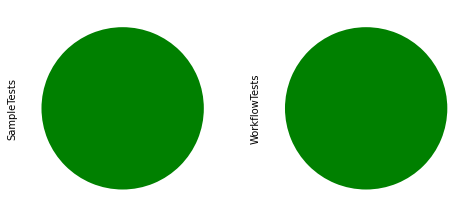

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa014b1190>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa014794f0>],
 dtype=object)

In [0]:
idx = df.groupby(["name", "tests", "succeeded", "errors", "failures", "skipped"]).first().index

gf = pd.DataFrame([[x for x in t] for t in idx], columns=idx.names)
gf.index = gf["name"]
gf = gf.iloc[:,2:]
gf.T.plot.pie(subplots=True, colors=['green', 'orange', 'red', 'yellow'], labeldistance=None, figsize=(8,8), legend=None)

Out[16]:

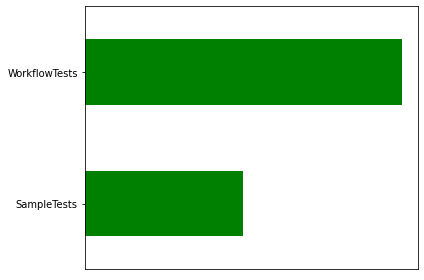

<matplotlib.axes._subplots.AxesSubplot at 0x7ffa012b04f0>

In [0]:
from matplotlib import pyplot as plt

plt.rcParams["figure.autolayout"] = True

group = df.groupby(["name"]).first()

group.loc[:, ["succeeded", "errors", "failures", "skipped"]].plot(kind="barh", stacked=True, color=['green', 'orange', 'red', 'yellow'], xticks=[], legend=None, xlabel="")


In [0]:
out.seek(0)
dbutils.notebook.exit(out.read().decode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<testsuites>
	<testsuite name="SampleTests-20210812095921" tests="2" file=".py" time="0.000" timestamp="2021-08-12T09:59:21" failures="0" errors="0" skipped="0">
		<testcase classname="SampleTests" name="test_never_fails" time="0.000" timestamp="2021-08-12T09:59:21"/>
		<testcase classname="SampleTests" name="tests_always_succeeds" time="0.000" timestamp="2021-08-12T09:59:21"/>
	</testsuite>
	<testsuite name="WorkflowTests-20210812095921" tests="4" file=".py" time="0.000" timestamp="2021-08-12T09:59:26" failures="0" errors="0" skipped="0">
		<testcase classname="WorkflowTests" name="test_input_and_output_value_matches" time="0.000" timestamp="2021-08-12T09:59:26"/>
		<testcase classname="WorkflowTests" name="test_name_transformation" time="0.000" timestamp="2021-08-12T09:59:26"/>
		<testcase classname="WorkflowTests" name="test_record_count" time="0.000" timestamp="2021-08-12T09:59:26"/>
		<testcase classname="WorkflowTests" name="test_record_is_p